# Required Libraries

In [ ]:
import numpy as np
import cv2 as cv

# Image Preprocessing and Extraction of Texture Traits
from skimage.feature import local_binary_pattern

# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras_preprocessing import image

# Cross Validation
from sklearn.model_selection import cross_val_score

# Plotting
import matplotlib.pyplot as plt

# Folder
import os
from google.colab import files

# Dataframe
import pandas as pd


#Local Binary Pattern

In [ ]:
# Settings for LBP
radius = 2
n_points = 8 * radius
METHOD = 'uniform'

Function for Local Binary Pattern Process

In [ ]:
def img_lbp_hos(source):
    lbp_array = local_binary_pattern(source, n_points, radius, METHOD)
    lbp_array_hist, bins = np.histogram(lbp_array.ravel(), 256, [0, 256])
    lbp_array_trans = np.transpose(lbp_array_hist[0:18, np.newaxis])

    return lbp_array_trans

# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Dataset_PPCD/"

In [ ]:
dataset = []
response = []

j = 0

for label in os.listdir(path):
  for img_path in os.listdir(path + '/' + label):
    try:
      img = cv.imread(path + '/' + label + '/' + img_path, 0)
      img = cv.resize(img, (150, 150))
      his_img = img_lbp_hos(img)
      dataset.append(his_img)
      response.append(j)
    except Exception as err:
      pass
  j += 1

In [ ]:
x = np.concatenate((dataset), axis=0).astype(np.float32)
y = np.array(response).astype(np.float32) 

# Create Dataframe after Feature Extraction Process

In [ ]:
x

array([[ 460.,  502.,  382., ...,  449., 1090., 4402.],
       [ 938.,  764.,  572., ...,  709., 1471., 6411.],
       [ 442.,  496.,  315., ...,  529., 1243., 4731.],
       ...,
       [ 917.,  827.,  557., ...,  736., 1722., 6715.],
       [ 976.,  879.,  503., ...,  753., 1882., 7126.],
       [ 961.,  803.,  483., ...,  764., 1638., 6409.]], dtype=float32)

In [ ]:
y

array([0., 0., 0., ..., 2., 2., 2.], dtype=float32)

In [ ]:
Y = pd.DataFrame(y, columns=["Label"])
X = pd.DataFrame(x).assign(label = Y)
Y["Label"].value_counts()

0.0    750
2.0    701
1.0    687
Name: Label, dtype: int64

In [ ]:
X.count()

0        2138
1        2138
2        2138
3        2138
4        2138
5        2138
6        2138
7        2138
8        2138
9        2138
10       2138
11       2138
12       2138
13       2138
14       2138
15       2138
16       2138
17       2138
label    2138
dtype: int64

In [ ]:
X.to_csv(r'feature_extraction_dataset.csv', index=False, header=True,index_label=None)

In [ ]:
X = pd.read_csv('feature_extraction_dataset.csv')
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,label
0,460.0,502.0,382.0,481.0,472.0,818.0,1188.0,2364.0,3057.0,2510.0,1275.0,991.0,622.0,681.0,756.0,449.0,1090.0,4402.0,0.0
1,938.0,764.0,572.0,480.0,421.0,624.0,934.0,1702.0,2270.0,1738.0,960.0,644.0,473.0,627.0,762.0,709.0,1471.0,6411.0,0.0
2,442.0,496.0,315.0,514.0,462.0,830.0,1193.0,2372.0,2925.0,2325.0,1179.0,984.0,627.0,660.0,673.0,529.0,1243.0,4731.0,0.0
3,863.0,787.0,477.0,447.0,458.0,679.0,929.0,1604.0,2101.0,1808.0,1043.0,813.0,553.0,597.0,727.0,679.0,1565.0,6370.0,0.0
4,800.0,775.0,473.0,517.0,440.0,644.0,1010.0,1709.0,2277.0,1802.0,1093.0,850.0,586.0,592.0,674.0,650.0,1441.0,6167.0,0.0
5,449.0,458.0,329.0,534.0,483.0,833.0,1278.0,2649.0,3267.0,2662.0,1436.0,959.0,643.0,682.0,672.0,430.0,898.0,3838.0,0.0
6,738.0,617.0,443.0,572.0,530.0,821.0,1099.0,2002.0,2744.0,2149.0,1138.0,913.0,615.0,654.0,641.0,523.0,1200.0,5101.0,0.0
7,354.0,420.0,311.0,448.0,512.0,907.0,1398.0,2442.0,3425.0,2674.0,1493.0,1087.0,673.0,700.0,605.0,388.0,936.0,3727.0,0.0
8,497.0,489.0,380.0,446.0,471.0,774.0,1227.0,2460.0,3649.0,2594.0,1324.0,888.0,584.0,519.0,505.0,407.0,974.0,4312.0,0.0
9,838.0,742.0,415.0,459.0,412.0,628.0,924.0,1698.0,2446.0,2016.0,950.0,694.0,522.0,568.0,751.0,667.0,1560.0,6210.0,0.0


Plotting Data

# Classification with KNN

Divide the dataset into train sets and validation sets with sizes of 80% and 20%, respectively.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

Plotting Data Rock, Paper, and Scissor

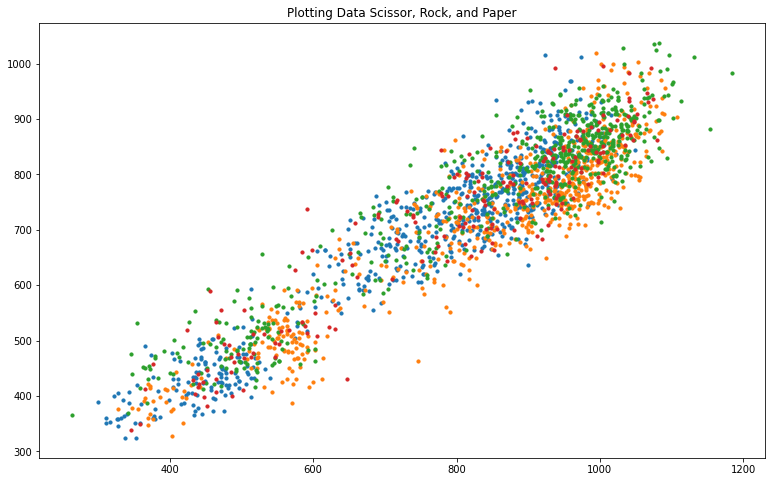

In [ ]:
plt.figure(figsize=[13, 8])

scissor = x_train[y_train.ravel() == 0]
plt.scatter(scissor[:, 0], scissor[:, 1], 10, cmap="autumn")

rock = x_train[y_train.ravel() == 1]
plt.scatter(rock[:, 0], rock[:, 1], 10, cmap="autumn")

paper = x_train[y_train.ravel() == 2]
plt.scatter(paper[:, 0], paper[:, 1], 10, cmap="autumn")

plt.scatter(x_test[:, 0], x_test[:, 1], 10, cmap="autumn")

plt.title("Plotting Data Scissor, Rock, and Paper")
plt.show()

Find Best Accuracy for KNN Model with Best K.

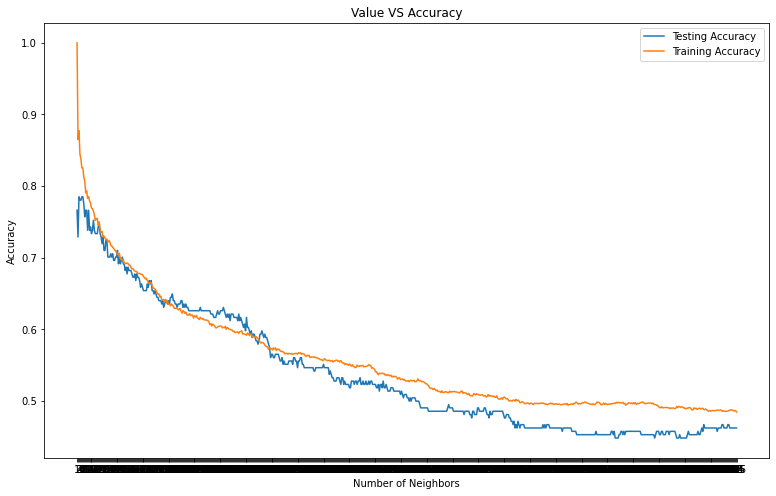

Best Accuracy is 0.7850467289719626 with K = 3


In [ ]:
# Model Complexity
neig = np.arange(1, 687)
train_accuracy = []
test_accuracy = []

# Loop Over Different Values of K
for i, k in enumerate(neig):
    
    # K from 1 to 687 (Exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit with knn
    knn.fit(x_train,y_train)
    
    # Train Accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    
    # Test Accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)

plt.show()

print("Best Accuracy is {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

Create a KNN Model Classification

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

# Evaluation with Cross Validation

Find Best Accuracy for Cross Validation with Best CV.

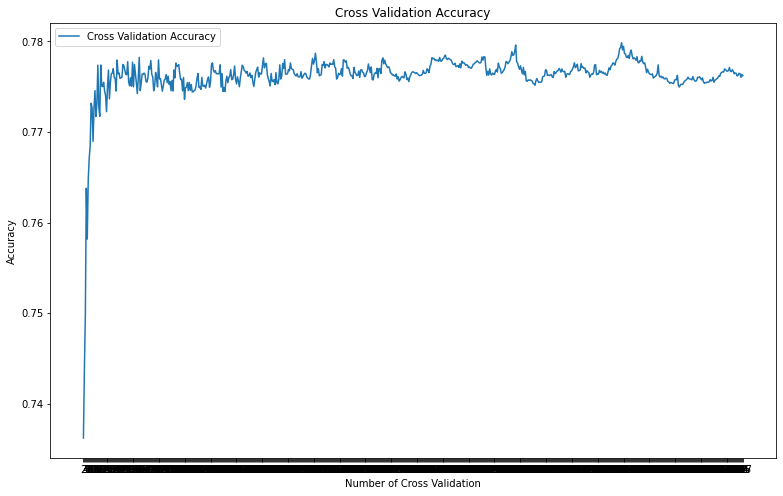

Best Cross Validation is 0.7798573975044564 with CV = 560


In [ ]:
# Model Complexity
neig = np.arange(2, 688)
cross_validation = []

# Loop Over Different Values of K
for i, cv in enumerate(neig):

    crossVal = cross_val_score(knn, x, y, cv=cv , scoring='accuracy')

    cross_validation.append(crossVal.mean())

# Plot
plt.figure(figsize=[13, 8])
plt.plot(neig, cross_validation, label = 'Cross Validation Accuracy')
plt.legend()
plt.title('Cross Validation Accuracy')
plt.xlabel('Number of Cross Validation')
plt.ylabel('Accuracy')

plt.xticks(neig)

plt.show()

print("Best Cross Validation is {} with CV = {}".format(np.max(cross_validation), 1 + cross_validation.index(np.max(cross_validation))))


In [ ]:
crossVal = cross_val_score(knn, x, y, cv=560, scoring='accuracy')

# Conclusion

In [ ]:
print("Prediction Value")
print(prediction)

print()
print("Y")
print(y_test)

print()
print("Accuracy         : ", float(accuracy_score(y_test, prediction))*100, end=""); print("%")
print("Cross Validation : ", crossVal.mean()*100, end=""); print("%")

Prediction Value
[0. 0. 2. 1. 0. 2. 1. 1. 0. 2. 0. 0. 2. 2. 2. 1. 2. 0. 2. 0. 2. 0. 0. 2.
 1. 2. 2. 0. 0. 0. 1. 0. 0. 1. 2. 1. 0. 1. 2. 2. 2. 1. 0. 2. 0. 2. 2. 2.
 2. 2. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 2. 1. 0. 2. 2. 2. 2.
 1. 0. 0. 0. 0. 1. 0. 0. 2. 0. 1. 0. 1. 0. 2. 2. 0. 1. 0. 2. 1. 1. 1. 0.
 0. 2. 2. 1. 2. 1. 1. 0. 2. 0. 0. 1. 1. 0. 0. 0. 2. 0. 1. 2. 2. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 2. 1. 2. 2. 1. 0. 1. 0. 2. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 2. 0. 2. 1. 0. 0. 1. 2. 1. 2. 1. 0. 0. 1. 2. 2. 2. 0. 0. 1.
 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 1. 2. 2. 0. 2. 0. 2. 2. 0. 2. 0. 0. 1. 2.
 0. 0. 0. 1. 0. 1. 0. 2. 0. 1. 1. 2. 1. 0. 0. 0. 0. 0. 1. 2. 0. 2.]

Y
[0. 0. 2. 1. 0. 2. 1. 2. 1. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 0. 2. 0. 0. 2.
 2. 2. 2. 0. 0. 2. 1. 2. 0. 0. 2. 1. 1. 1. 2. 2. 2. 1. 0. 0. 2. 2. 2. 0.
 1. 2. 1. 1. 1. 2. 0. 2. 0. 0. 0. 0. 1. 2. 1. 0. 2. 2. 1. 2. 2. 0. 2. 2.
 1. 1. 0. 0. 1. 1. 2. 2. 2. 0. 1. 2. 1. 1. 2. 0. 2. 1. 0. 2. 1. 2. 0. 0.
 0. 2. 2. 1. 2. 1. 1. 2. 2. 0. 2. 1.

Saving ImagePaperTest.jpg to ImagePaperTest.jpg
ImagePaperTest.jpg
Paper


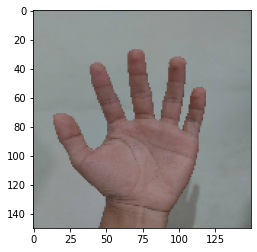

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)

  img_grayscale = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
  his_img = img_lbp_hos(img_grayscale)
  y = np.array(his_img).astype(np.float32)

  classes = knn.predict(y)

  print(fn)
  if classes == 0:
    print('Scissors')
  elif classes == 1:
    print('Rock')
  else:
    print('Paper')